# TSF Task 3: Exploratory Data Analysis - Retail

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

Dataset: https://bit.ly/3i4rbWl

## Author: Sourav Kumar

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

plt.style.use('ggplot')

from scipy import stats
from scipy.stats import norm, skew

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file
data = pd.read_csv("SampleSuperstore.csv")

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Shape of the data
data.shape

(9994, 13)

In [6]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Sales,12.970805
Profit,7.560297
Discount,1.684042
Quantity,1.278353
Postal Code,-0.128506


Checking the skewness it is clear that sales and profit is not distributed normally.

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**It can be clearly seen that for 3 categories(total subcategories are 17) of products there are only 4 types of shipping modes in 4 different regions among 49 different states of the same country. Also there are only 3 segments among whom the products are distributed.**

### Checking Missing Values

In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No Null Values

In [10]:
correlation = data.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


No numerical input has a satisfactory amount of correlation with the target.

### Dropping the useless columns

In [11]:
data.drop(['Postal Code', 'Country'], axis=1, inplace=True)

## Visualizations

**Heatmap**

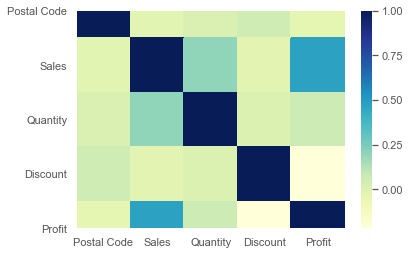

In [12]:
sns.heatmap(correlation, cmap="YlGnBu" )

**Pairplot**

- Pairplot will allow us to see both distribution of single variables and relationships between two variables.

**Pairplot based on Segment**

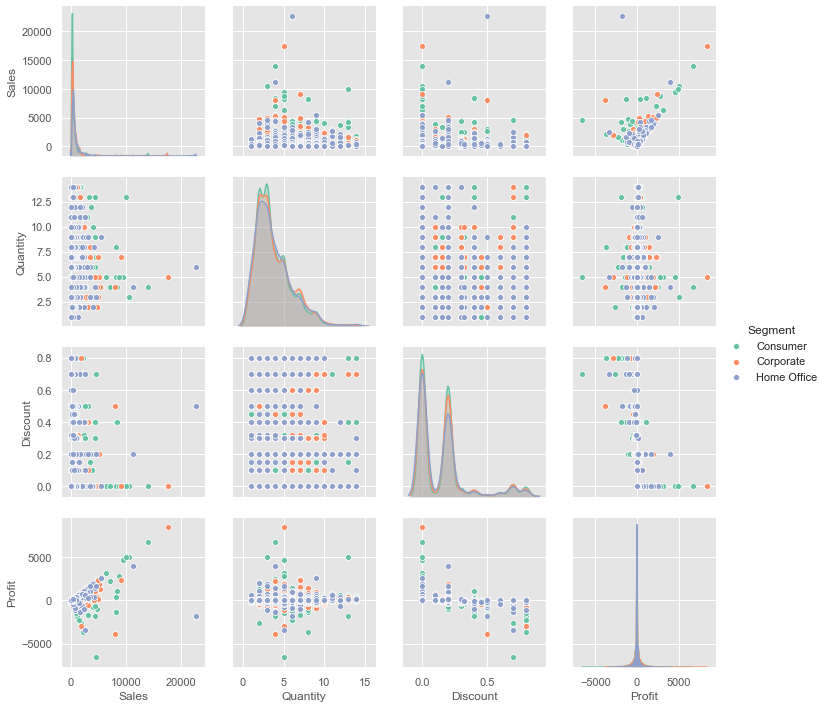

In [13]:
sns.pairplot(data, hue="Segment", palette="Set2")
plt.show()

**Pairplot based on Ship Mode**

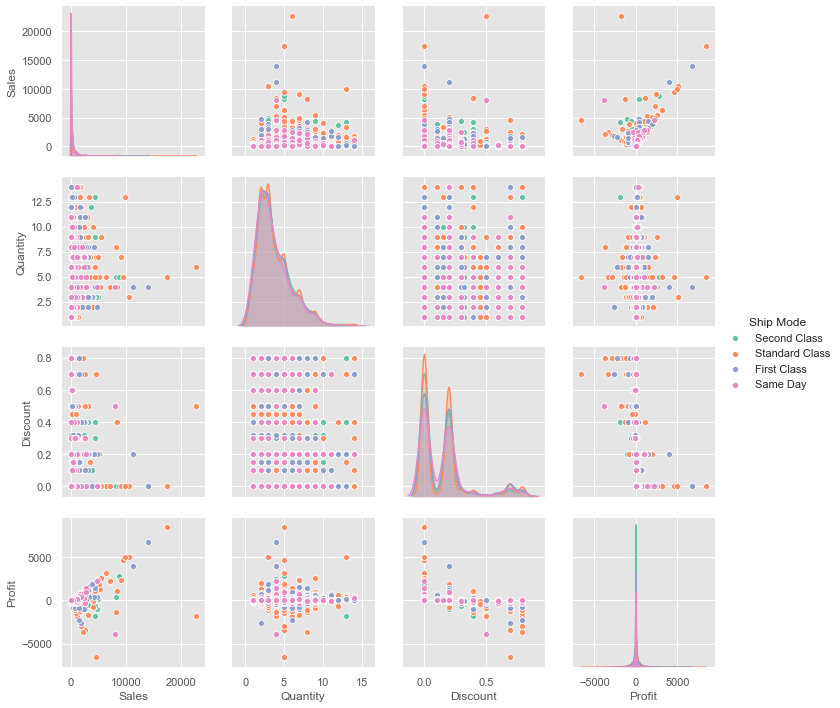

In [14]:
sns.pairplot(data, hue="Ship Mode", palette="Set2")
plt.show()

**Pairplot based on different Regions**

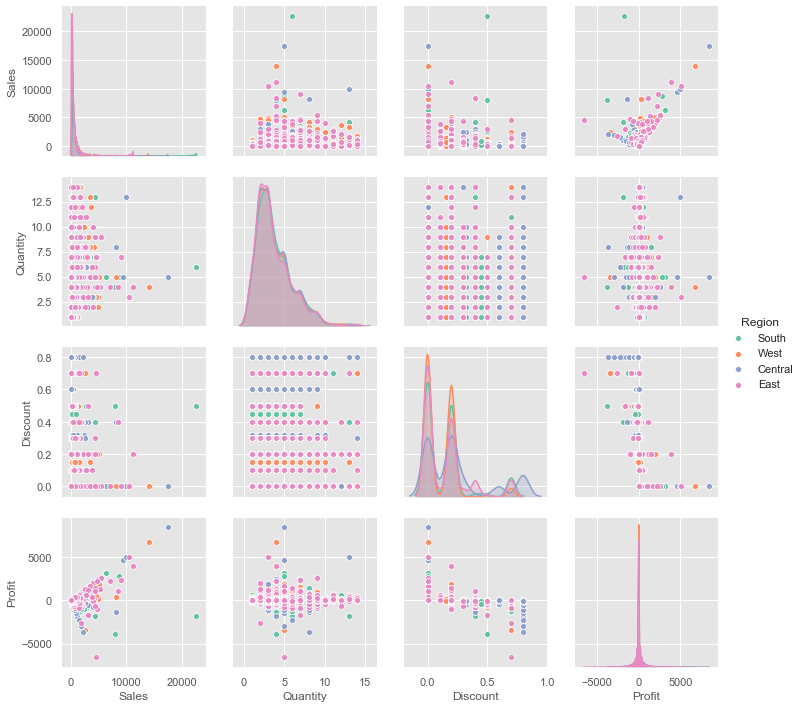

In [15]:
sns.pairplot(data, hue="Region", palette="Set2")
plt.show()

**Pairplot based on different categories of products**

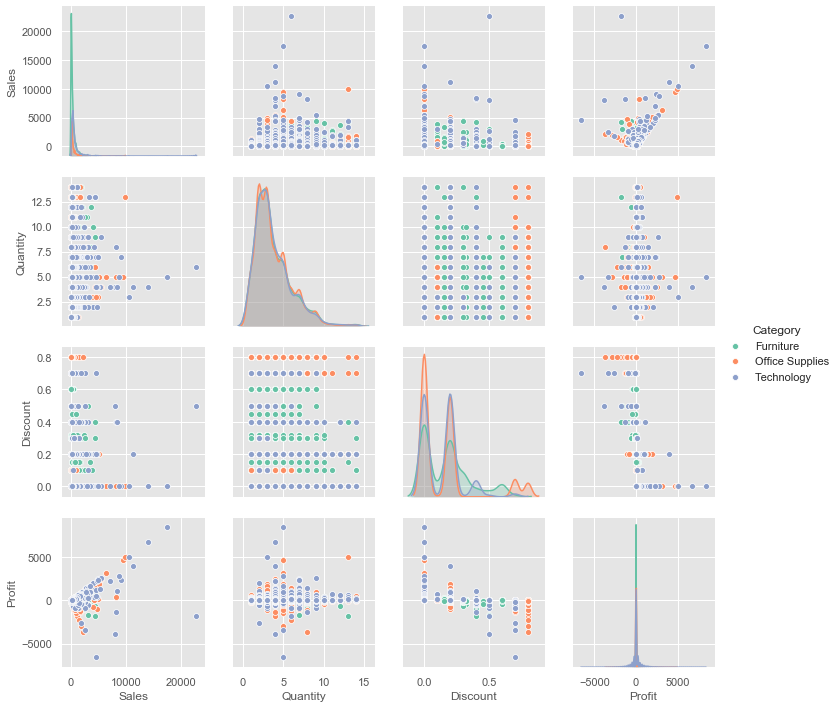

In [16]:
sns.pairplot(data, hue="Category", palette="Set2")
plt.show()

**Pairplot based on different sub-categories of products**

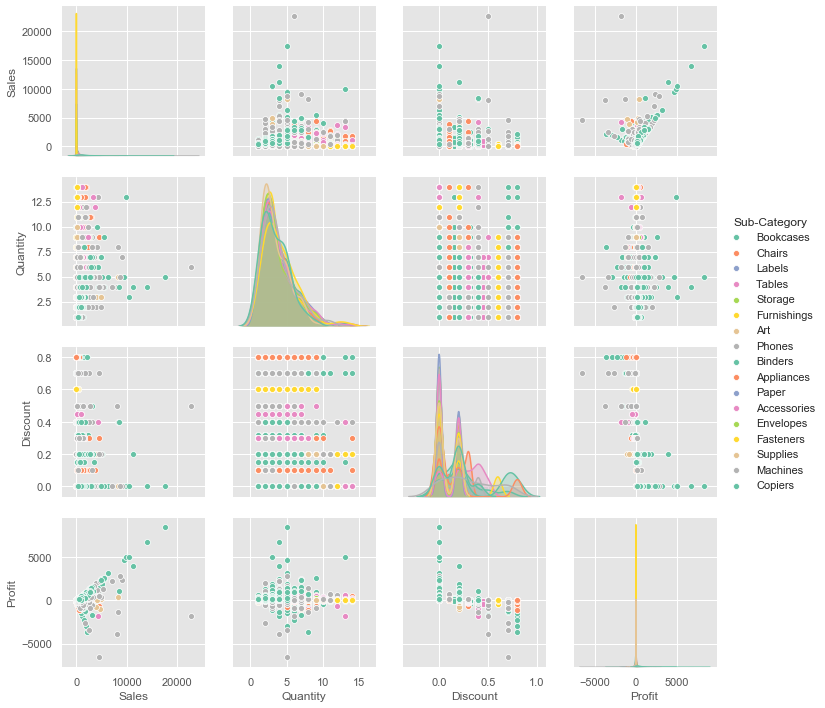

In [17]:
sns.pairplot(data, hue="Sub-Category", palette="Set2")
plt.show()

**From the pairplots above based on different features it can be seen that the profit is a mixture of all categories in features, may it be 'Categories', 'Region', 'Ship Mode', 'Segment' and this is true in real life scenarios also.**

Text(0.5, 1.0, 'Category vs Sub Category')

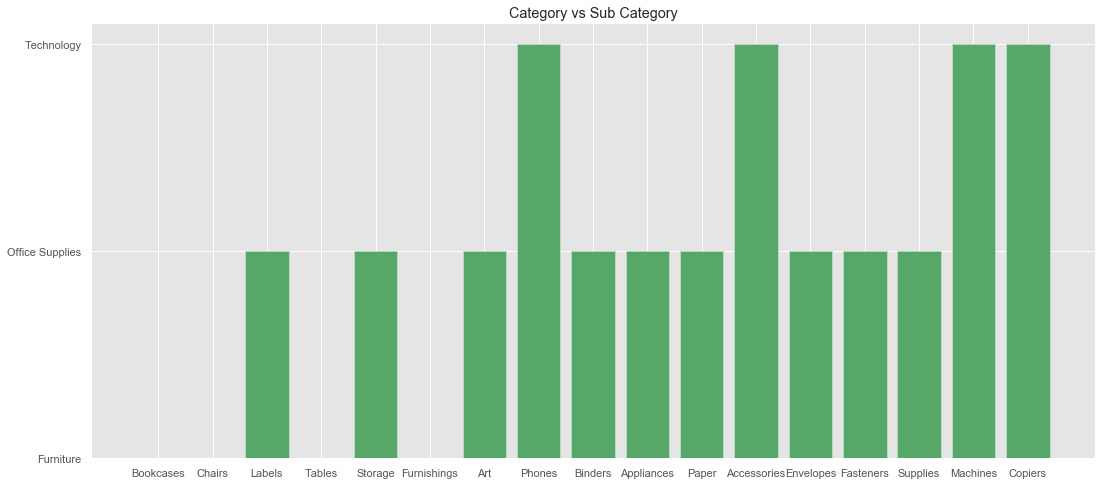

In [18]:
plt.figure(figsize=(18,8))
plt.bar('Sub-Category','Category',data=data, color='g');
plt.title('Category vs Sub Category')

This graph can easily help to makeout which subcategory to choose when purchasing a product.

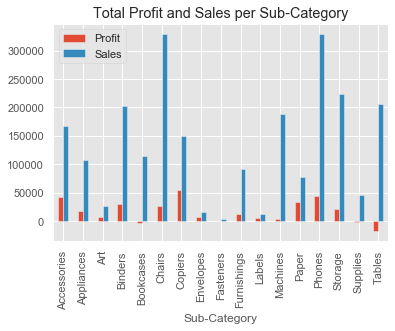

In [19]:
data.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot.bar()
plt.title('Total Profit and Sales per Sub-Category');

The above barplot depicts a lot about the profit gained from selling various products. Though sales for various products is high but they have a very low profit margin. Sub_Categoried like Machines, Bookcases, Tables etc. may have high sale but the profit is very low or negative(in case of Tables). On the other hand products like Copiers, Paper comparitively have less sales but give more profit. This just shows the random behaviour in which a market acts.

In [20]:
data['Cost']=data['Sales']-data['Profit']
data['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [21]:
data['Profit %']=(data['Profit']/data['Cost'])*100
data.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


From above it is very much clear that retailers selling phones and paper got a 100% profit.

In [22]:
# Count the total repeatable states
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

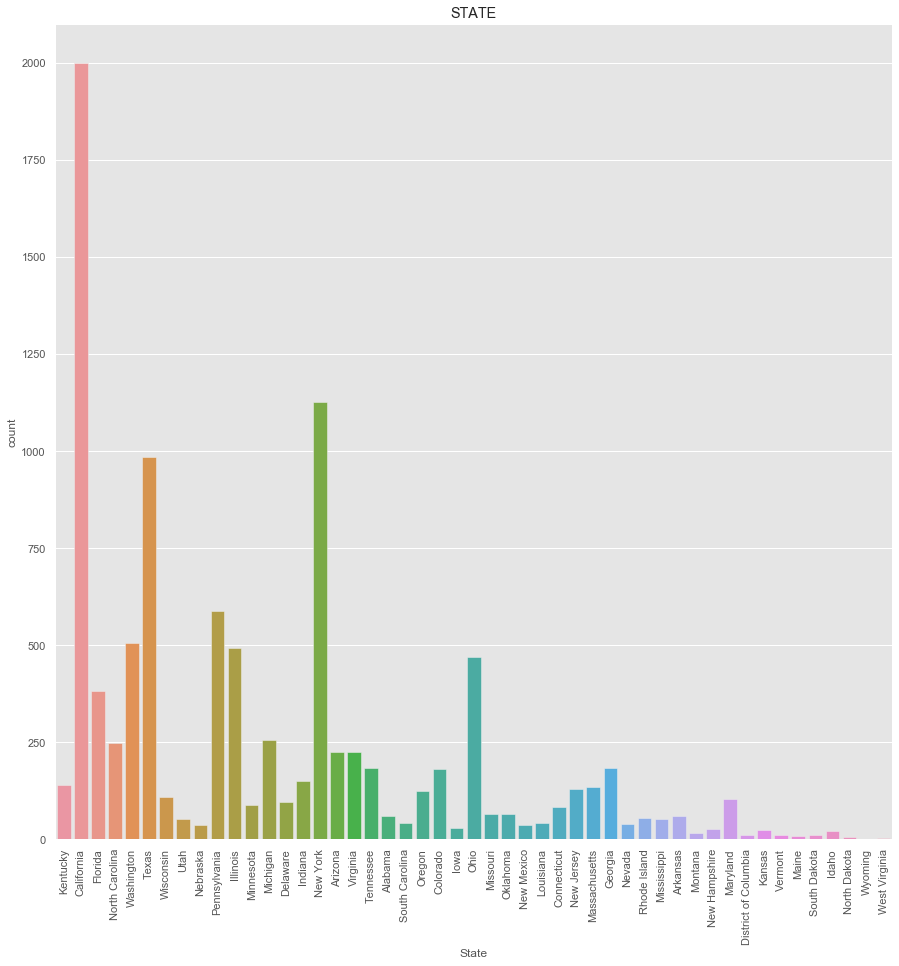

In [23]:
plt.figure(figsize=(15,15))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

Sales count in states like California, Texas, New York are a lot higher than other states. 

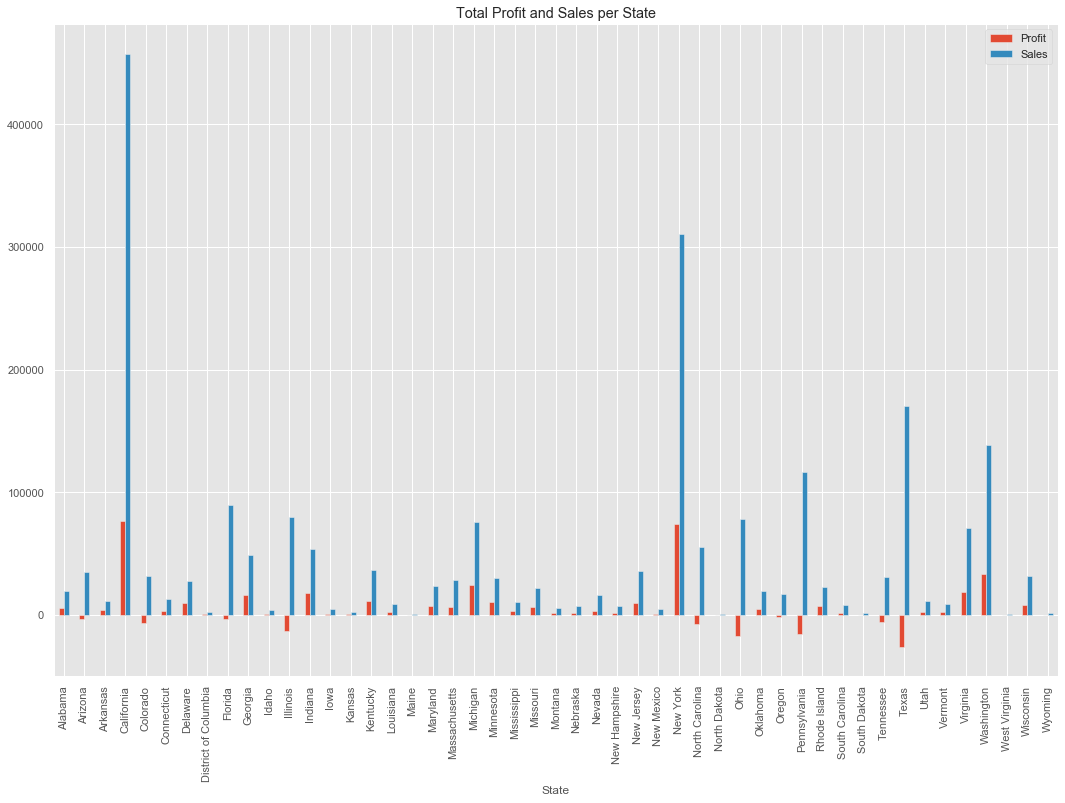

In [24]:
data.groupby('State')['Profit','Sales'].agg(sum).plot.bar(figsize=(18,12))
plt.title('Total Profit and Sales per State');

Sales and Profit according to the states depicts how profit and sales are distributed among different states.

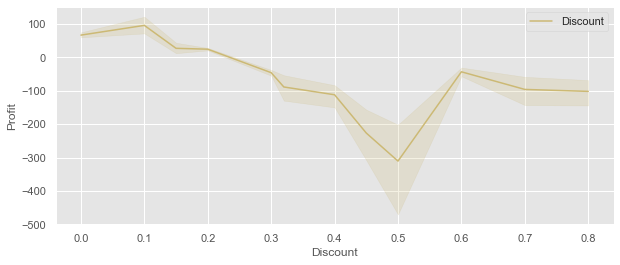

In [25]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=data , color='y',label='Discount')
plt.legend()
plt.show()

**Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales.**

But.........

- 1 What products do the most profit making states buy?

- 2 What products do the loss bearing states buy?

- 3 What product segment needs to be improved in order to drive the profits higher?

In [26]:
def state_data_viewer(states):
    product_data = data.groupby(['State'])
    for state in states:
        data1 = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (24,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data1.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

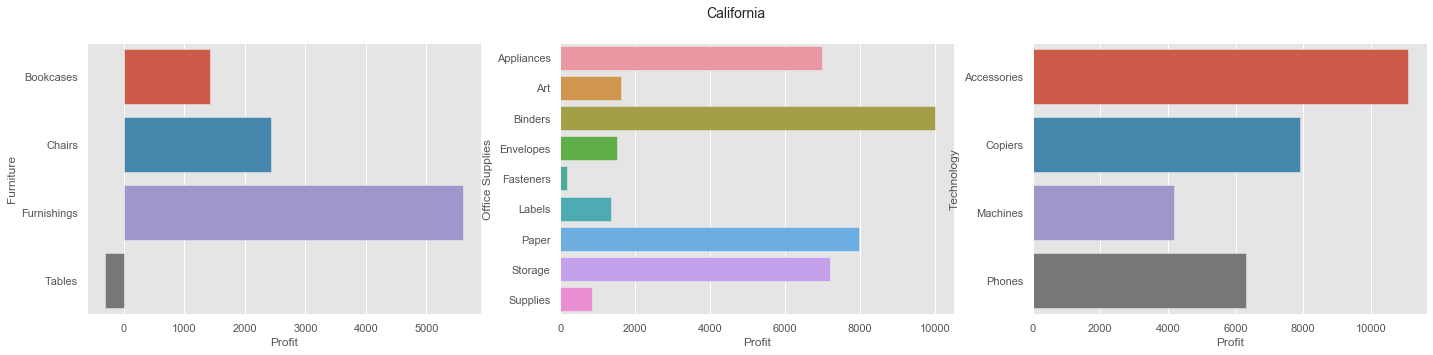

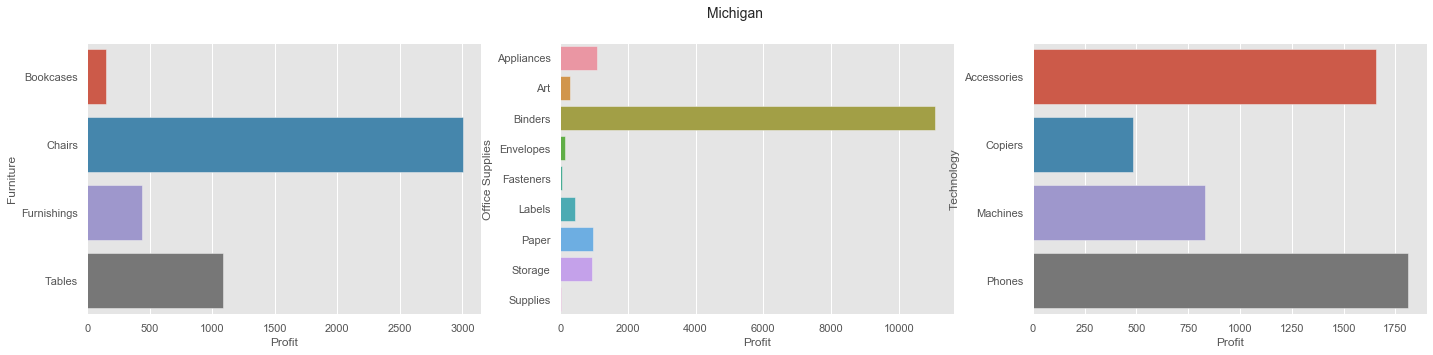

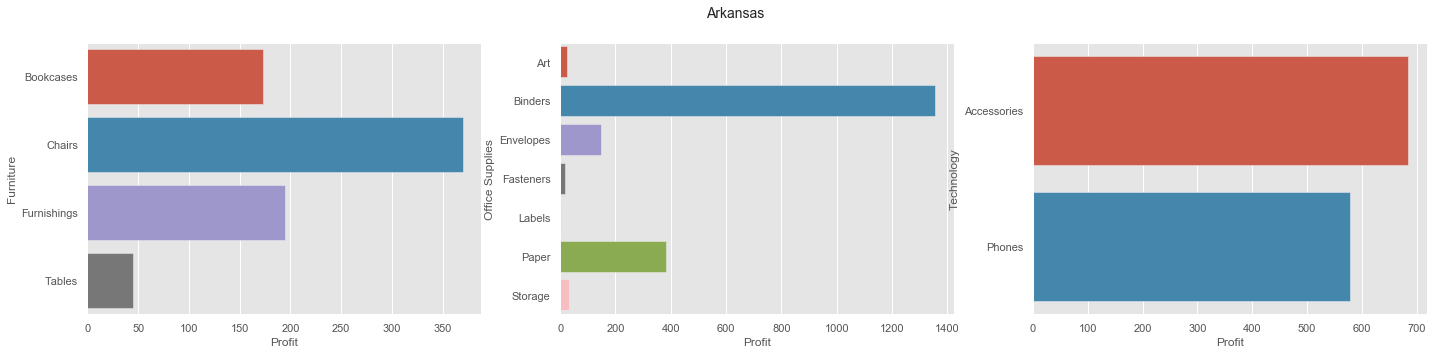

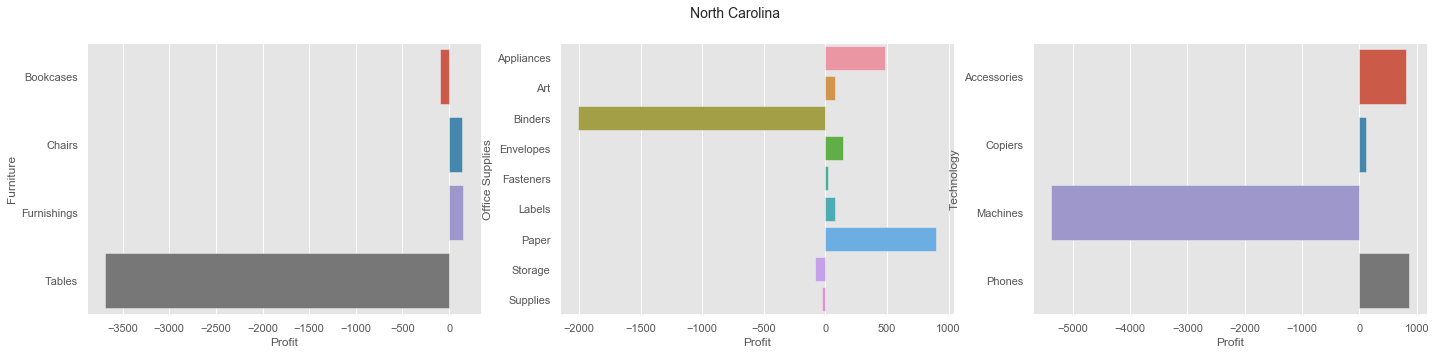

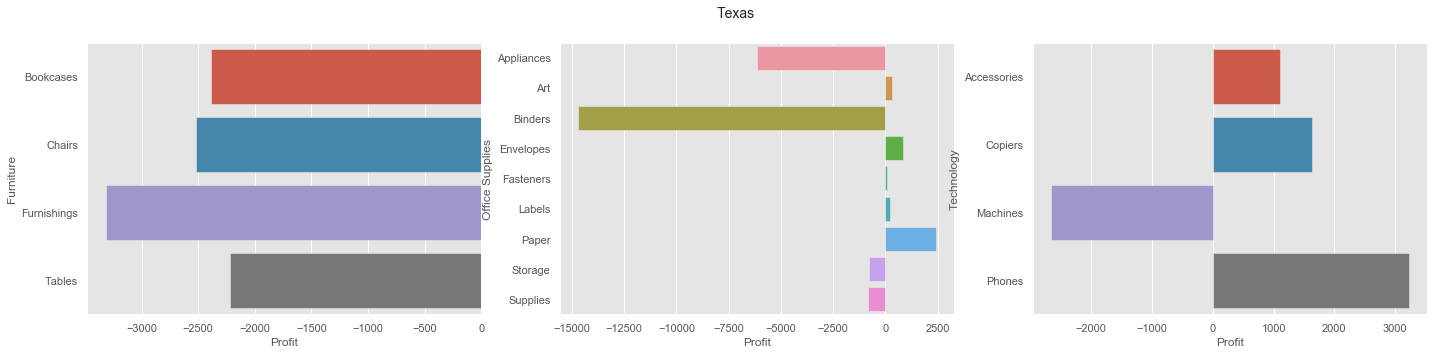

In [27]:
states = ['California', 'Michigan', 'Arkansas', 'North Carolina', 'Texas']
state_data_viewer(states)

**From the Above data Visualization we can see that in which States and in which Category the Sales and profits are High or less, we can improve in that States by providing Discounts in prefered range so that company and cosumer both will be in profit.**

Also, one thing to be noted is that even if the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of business.